# Dataset Description
The data provided in this Github link is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

## Import important libraries

In [14]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(10,5)) #to set a common standard size for all plots

## Loading and understanding the dataset.

In [3]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url)
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [14]:
#to know the shape of the dataset, the total columns and rows
fuel_data.shape

(29523, 11)

In [15]:
#view each feature in the dataset
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [4]:
#view the datatypes of each feature
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [18]:
#to show each feature and the number of unique elements each contains
fuel_data.nunique(axis=0)

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

In [20]:
#to show the types of fuel the dataset contains
fuel_data.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [10]:
#group dataframe by the fuel type code, year as well as print the first entries of all the groups formed 
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [21]:
#this showed that the dataset covered from year 1994-2018
fuel_data.report_year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [9]:
#this is to show how much data is recorded for each year
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [5]:
#to calculate the various statistical measurement of the entire dataset
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1995_12_99_0_12,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


## Cleaning the dataset

In [7]:
#check for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

##### Observation: only the fuel unit feature in the dataset had missing values with a total of 180 missing values

<function matplotlib.pyplot.show>

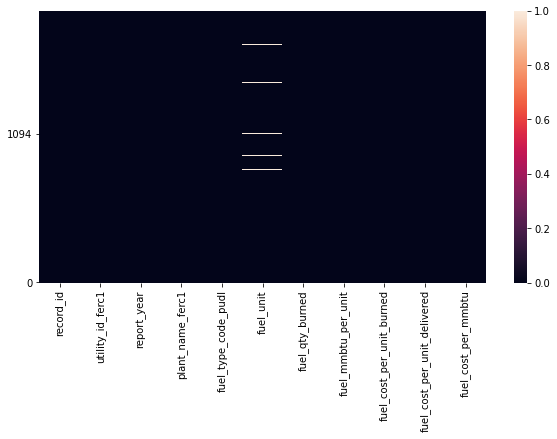

In [15]:
#using a heatmap to show the graphical representation of the missing values 
j=sns.heatmap(fuel_data.isnull())
j.set_ylim(0, 2000)
plt.show

##### To clean the dataset, the missing values would be filled with the most common value in the fuel unit feature. This is a modal imputation method which is considered the best for this feature as it is a categorical feature.

In [8]:
#count the number of times each value in the fuel_unit column appeared in the columnn
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

##### Observation: this revealed that the value "mcf" appeared 11354 times in the fuel unit column which makes it the most common value in the fuel unit feature. It makes it safe to assume that the missing values has a higher probability of being "mcf" (which is the most common value) than being any other value. With this assumption the missing values in the fuel unit feature would be filled with "mcf" as shown below.

In [9]:
#fill the missing  values with the most common value "mcf"
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [10]:
#check if there are still any missing values
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

## Understanding and Analyzing the relationship between the variables

In [22]:
#shows the relationship between the fuel types and the fuel units.
fuel_data.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count()

fuel_type_code_pudl  fuel_unit
coal                 bbl              1
                     mcf             56
                     mmbtu           52
                     ton           8438
gas                  bbl              2
                     mcf          11386
                     mmbtu           94
                     ton              4
nuclear              gramsU         464
                     kgU            110
                     mcf             15
                     mmbtu           34
                     mwdth           95
                     mwhth          100
oil                  bbl           7952
                     gal             81
                     mcf             28
                     ton              3
other                bbl             42
                     gal              3
                     mcf             45
                     ton             77
waste                bbl              1
                     mcf              4
         

##### Observation: the above shows how many fuel unit measurement each fuel type was measured in and how popular the fuel unit was for that fuel type. it showed that coal was popularly measured in ton, gas in mcf, nuclear in gramsU, oil in bbl, other in ton and waste in ton also. This is also demonstrated below.

In [11]:
#to show the most popular unit of measurement for each fuel type
fuel_data.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count().nlargest()

fuel_type_code_pudl  fuel_unit
gas                  mcf          11333
coal                 ton           8438
oil                  bbl           7952
nuclear              gramsU         464
waste                ton            436
Name: fuel_unit, dtype: int64

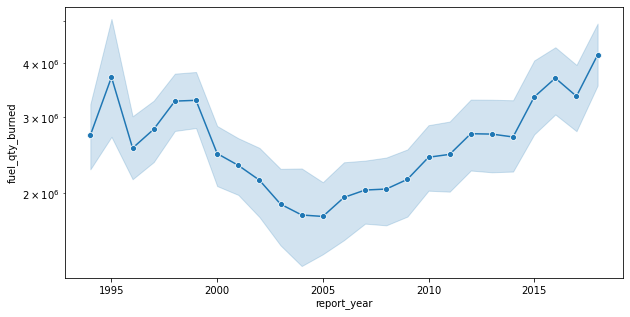

In [16]:
#this shows how much fuel was burned in each year
lot =sns.lineplot(data=fuel_data,x='report_year', y='fuel_qty_burned',marker='o')
lot.set_yscale('log')

##### Observation: this showed that fuel burned peaked in 1995, then declined having the lowest low in 2005 (which was probably most favourable to the climate) and then peaked again in 2018

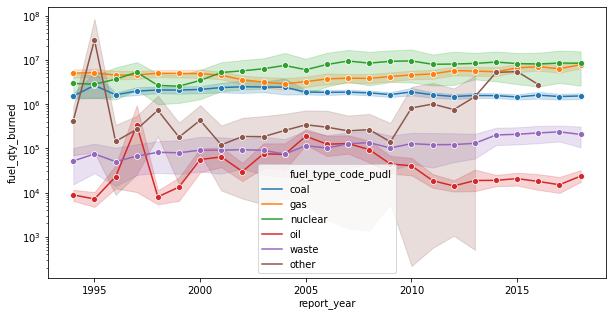

In [17]:
#this shows how much each fuel type was burned in each year
lot =sns.lineplot(data=fuel_data,x='report_year', y='fuel_qty_burned', hue= 'fuel_type_code_pudl',marker='o')
lot.set_yscale('log')

##### Observation: this showed that gas was the most burnt fuel in the 90s while nuclear was the most burnt fuel in the 20s followed by coal, other, waste and oil in that order, with other being the most burnt in 1995.

## Correlation Matrix
Correlation measures the extent of the relationship between two variables. It scales the relationship between +1 and -1 with a  coefficient that tends towards +1 meaning a positive relationship while those that tend towards -1 meaning a negative relationship and 0 indicating no relationship exists 

In [28]:
# calculate correlation matrix
corr = fuel_data.corr().reset_index()
print(corr)

                          index  utility_id_ferc1  report_year  \
0              utility_id_ferc1          1.000000     0.093323   
1                   report_year          0.093323     1.000000   
2               fuel_qty_burned         -0.057447     0.012952   
3           fuel_mmbtu_per_unit         -0.066946    -0.110853   
4     fuel_cost_per_unit_burned         -0.037863     0.013599   
5  fuel_cost_per_unit_delivered         -0.016414    -0.014043   
6           fuel_cost_per_mmbtu          0.006122     0.010261   

   fuel_qty_burned  fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0        -0.057447            -0.066946                  -0.037863   
1         0.012952            -0.110853                   0.013599   
2         1.000000            -0.080946                  -0.018535   
3        -0.080946             1.000000                  -0.010034   
4        -0.018535            -0.010034                   1.000000   
5        -0.003551            -0.009039            

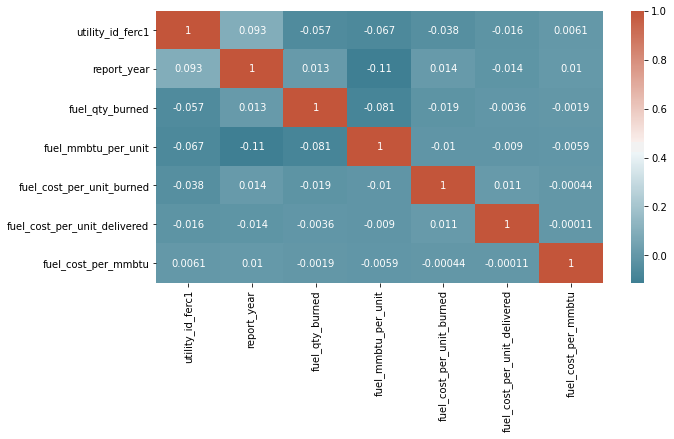

In [22]:
#plot a heat map to show the correlation relationships
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Scatter plots
A scatterplot like correlation matrices allows you to quickly understand a relationship between two variables and it’s also useful for identifying outliers.

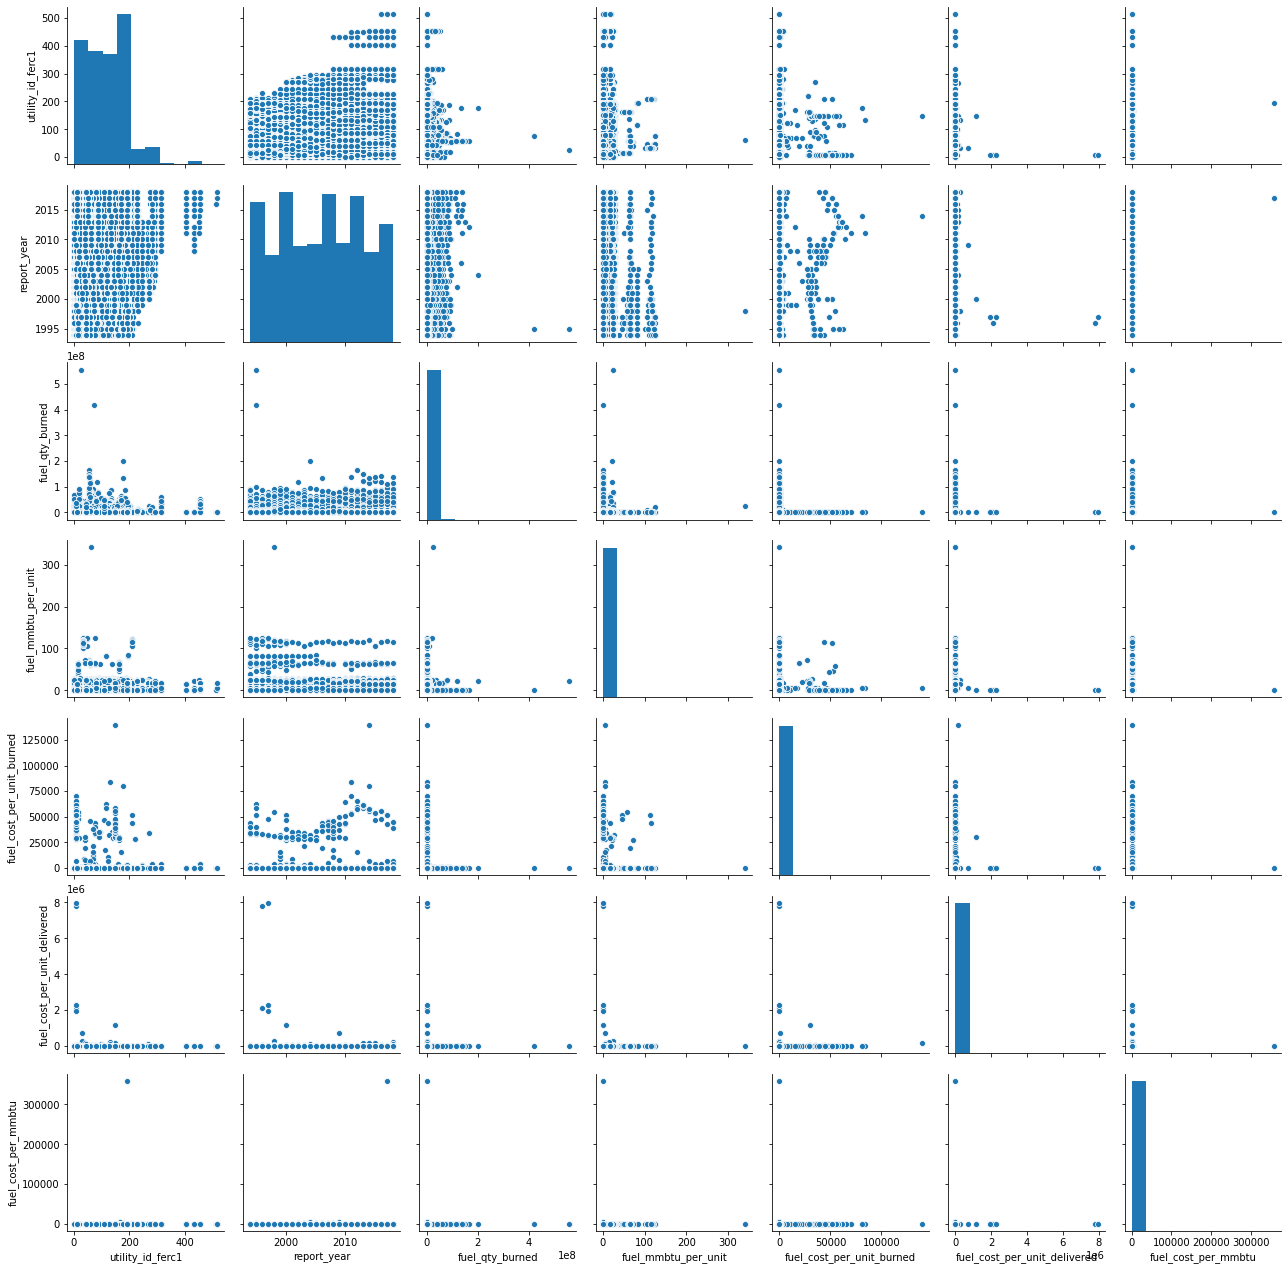

In [29]:
#this plots a scatterplot between each numerical feature in the dataset giving an overall summary.
sns.pairplot(fuel_data)

## There are still several visualization tools and analysis that could be done with this data set especially in relation to climate change so feel free to pull this workbook, perform more analysis, contribute and comment. Thank you! 